# Multiple Linear Regression
## Boom Bikes Case Study

#### Problem Statement:

To understand the factors on which the demand for these shared bikes depends. Specifically, To understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the Travel dataset

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [2]:
#Travel data loaded
travel = pd.read_csv("day.csv")

In [3]:
# Check the head of the dataset
travel.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the travel dataframe

In [4]:
travel.shape

(730, 16)

In [5]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There is no missing data and only field(dteday) having object type which is also available in other fields

In [6]:
travel.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Drop the columns whicha are not features or fields are alrady capture with other columns

In [7]:
travel = travel.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

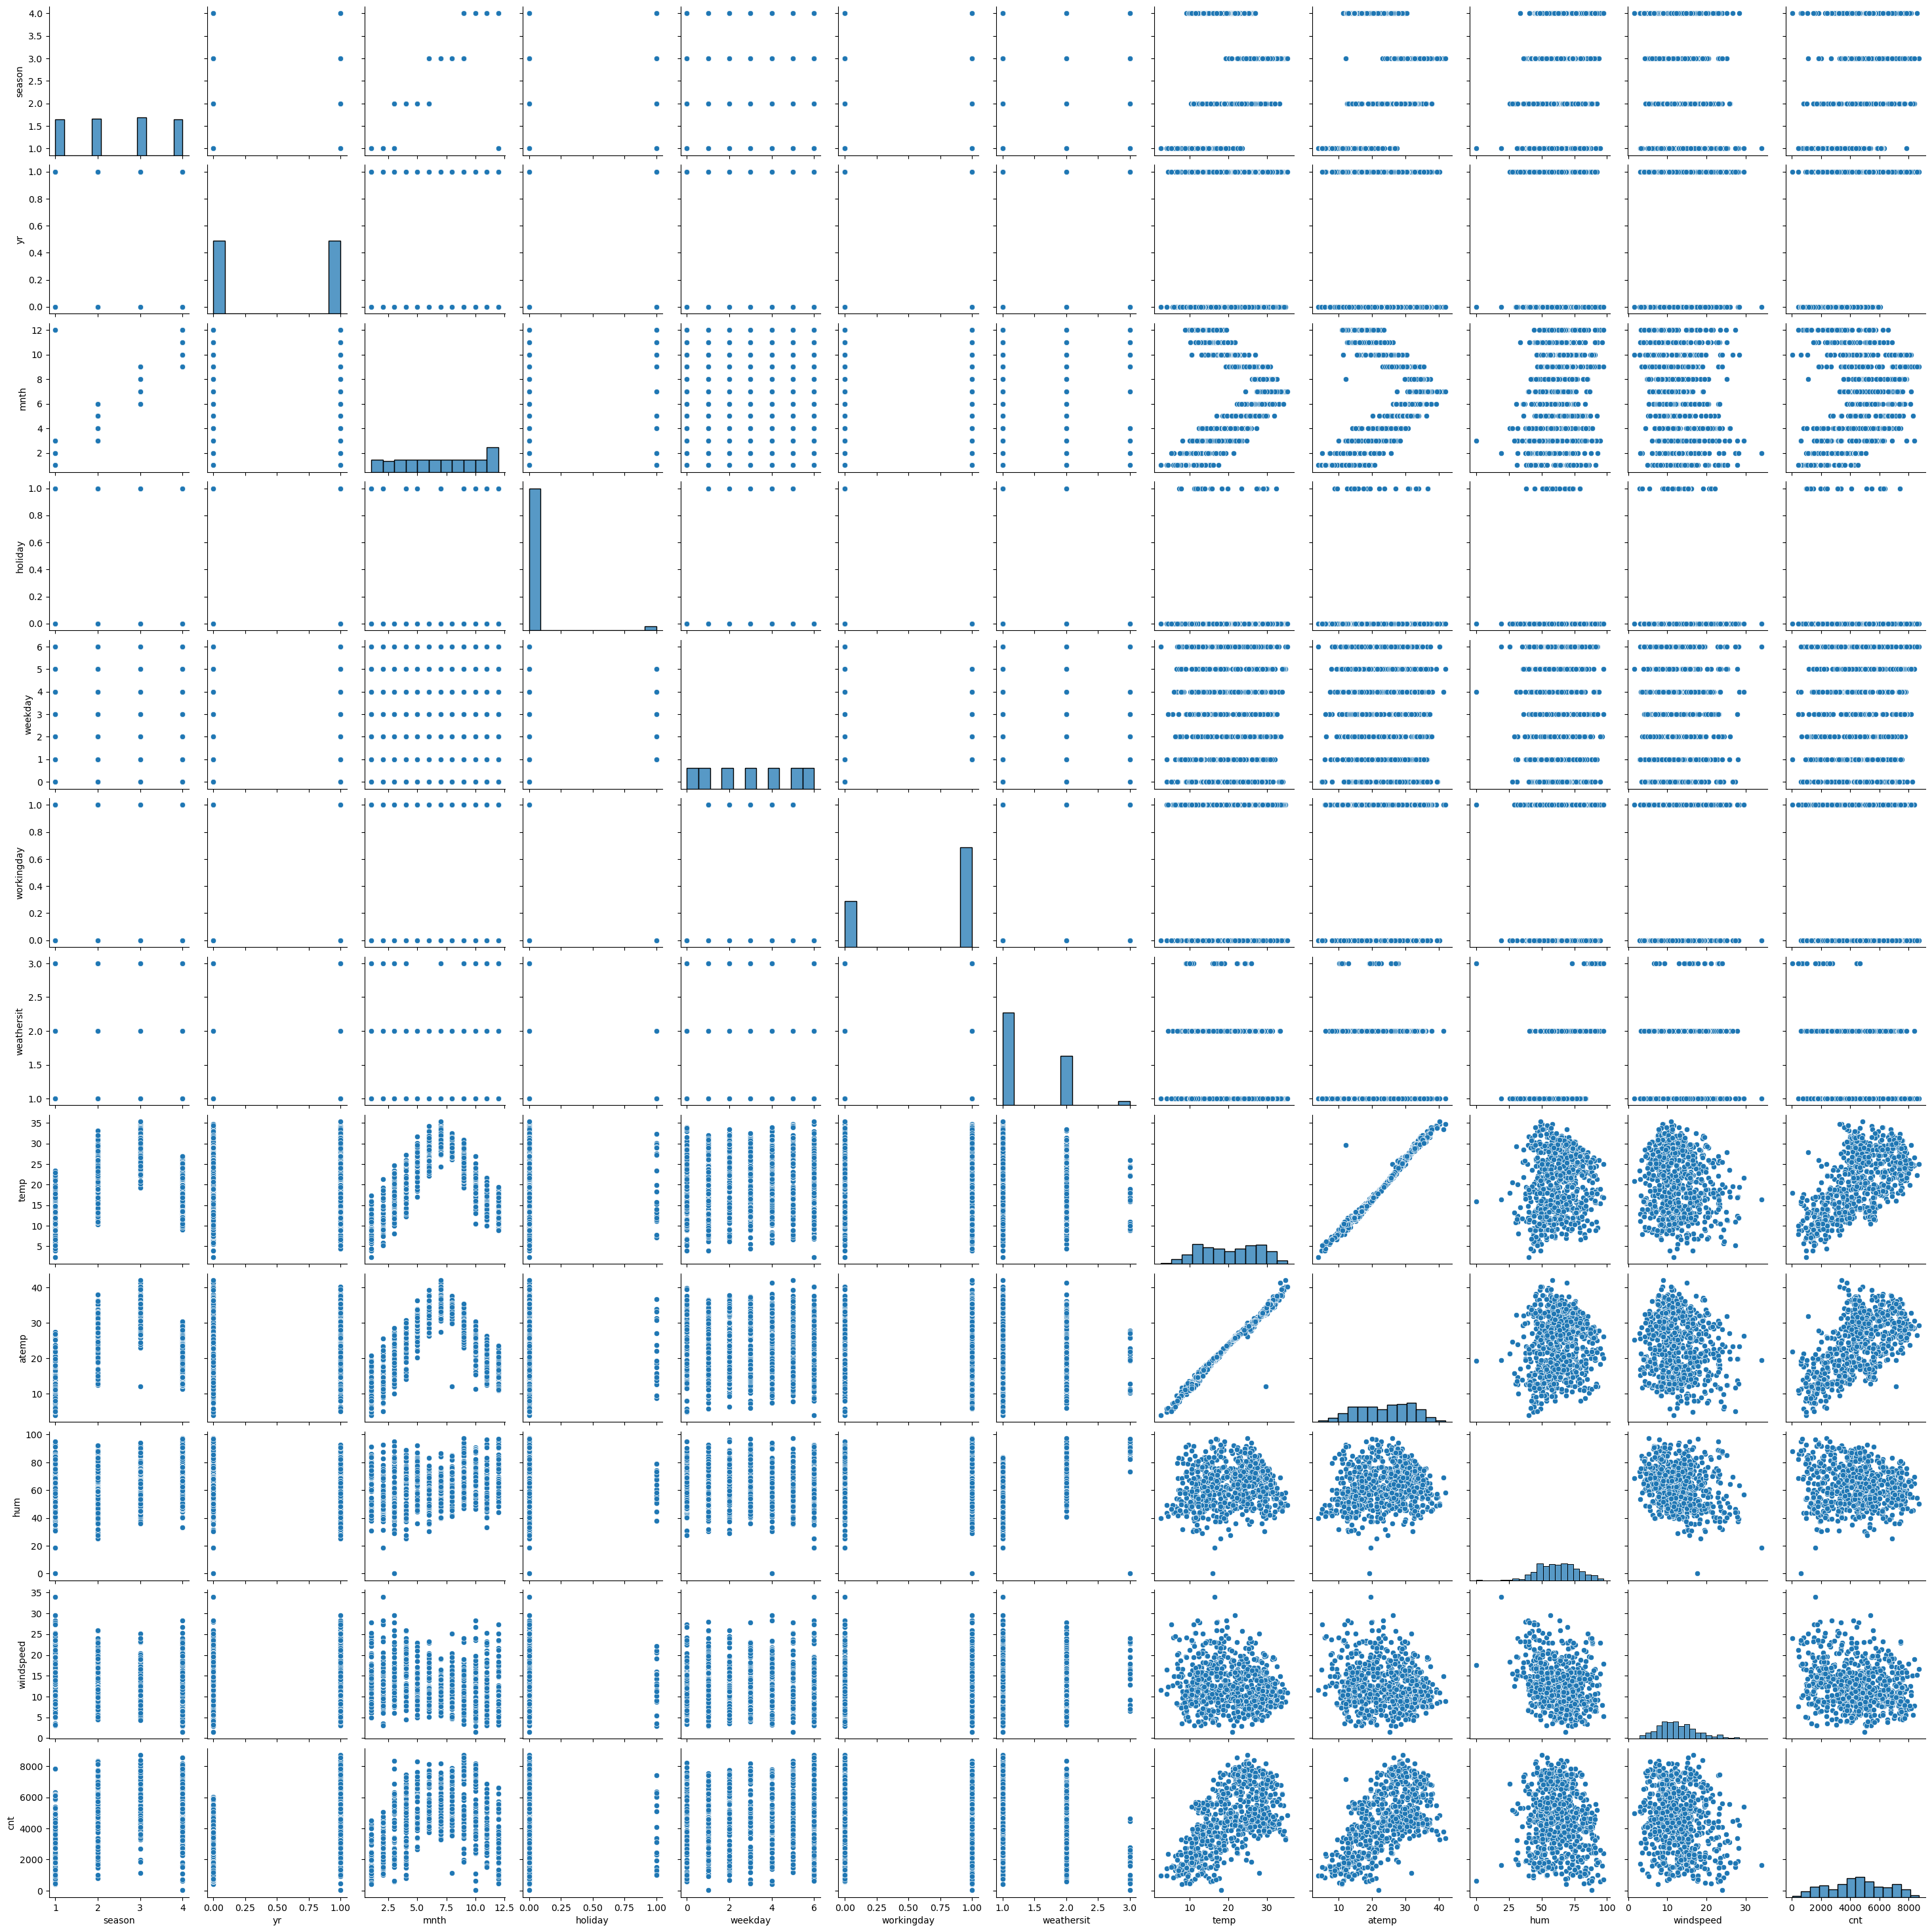

In [9]:
sns.pairplot(travel)
plt.show()

temp and atemp is clearly having multicollinearity

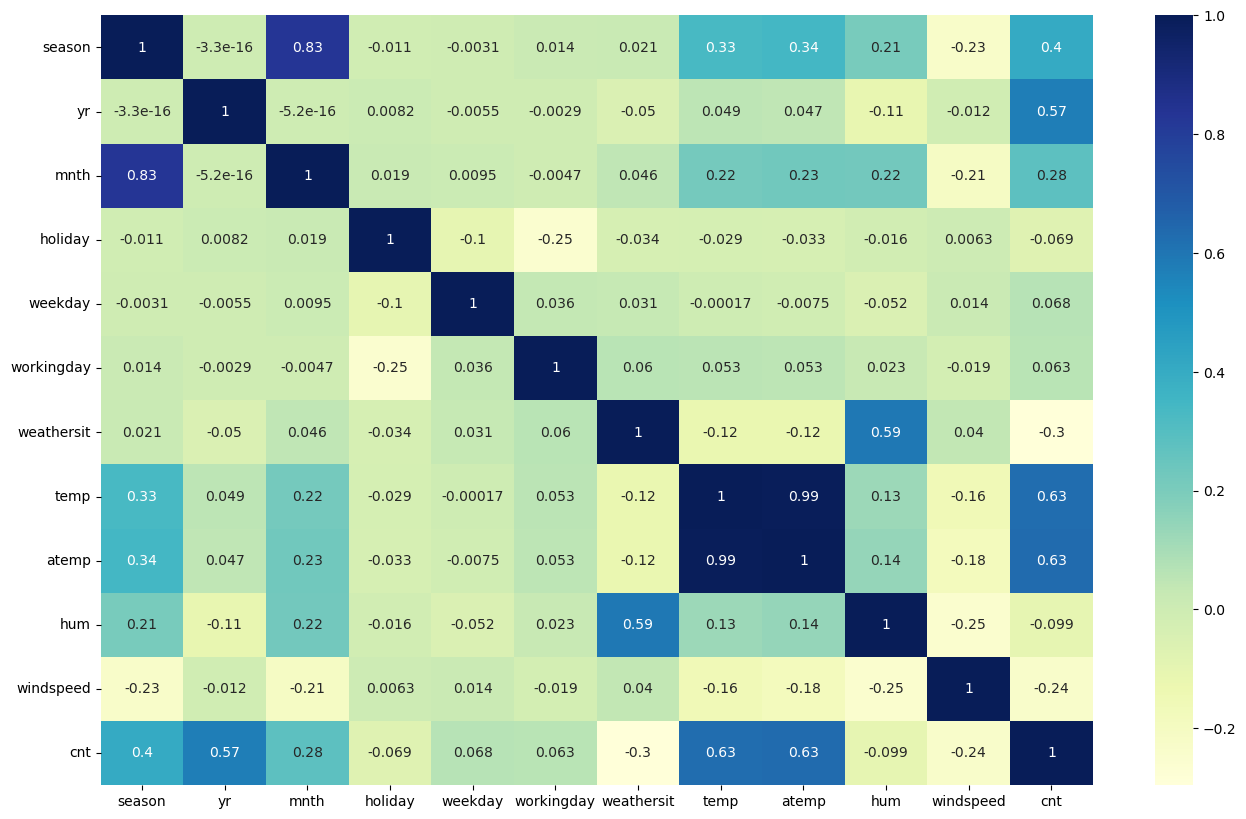

In [10]:
plt.figure(figsize = (16, 10))
sns.heatmap(travel.corr(), annot = True, cmap="YlGnBu")
plt.show()

Season, Year, month, teamp, atemp have good positive correlation with count and windspeed have good negative correlation with count

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

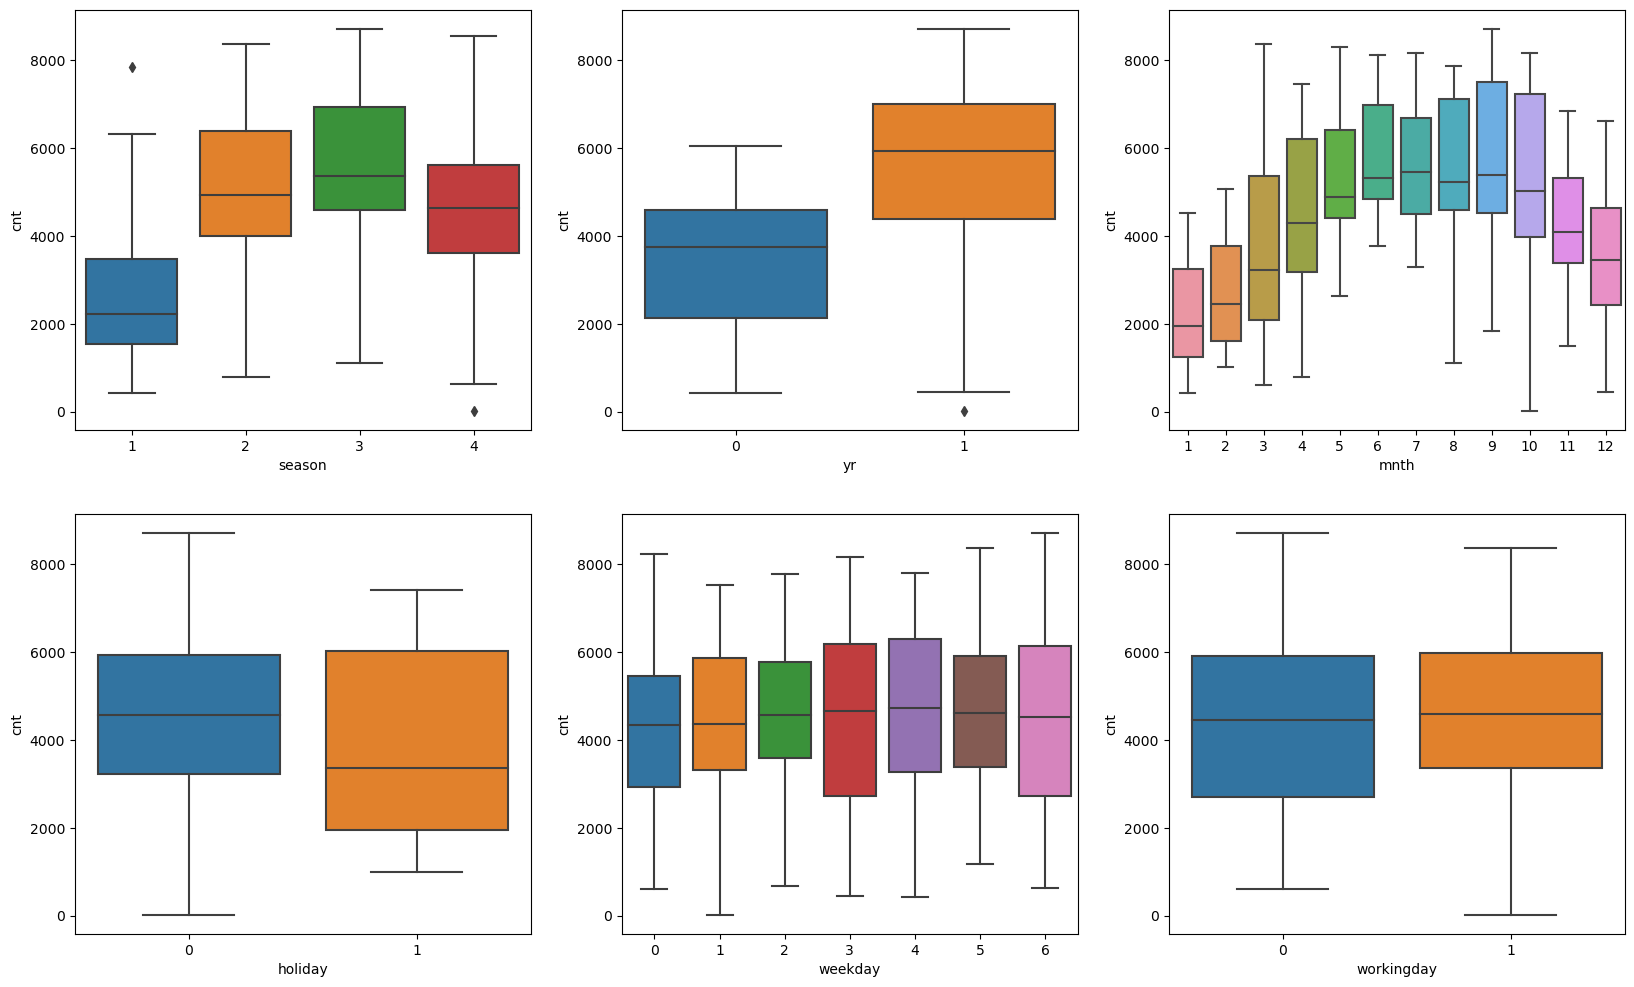

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = travel)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = travel)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = travel)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = travel)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = travel)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = travel)
plt.show()

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `season` with `yr` as the hue.

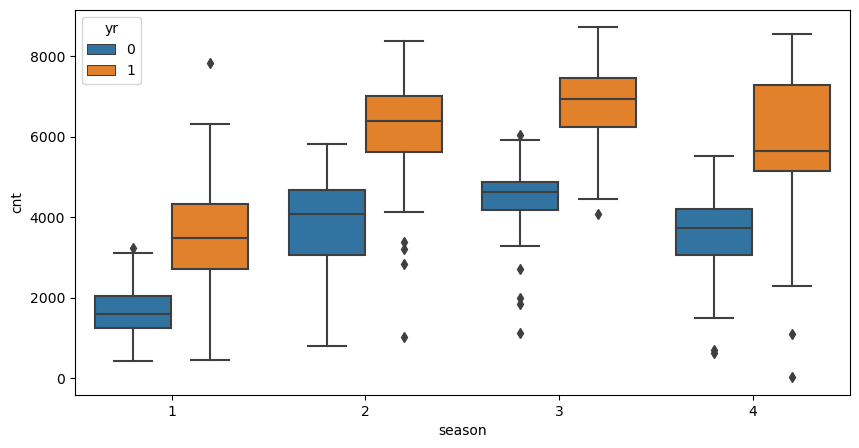

In [12]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'yr', data = travel)
plt.show()

Season, year and month have clear relation with count as seen from box plot

## Step 3: Data Preparation

- All columns are already in numerical values, so no data conversion required.
- But you can see that our dataset has many categorical columns with values encrypted. Hence, we need to convert them to there actual value

In [13]:
travel.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
#Season mapping
travel['season'] = travel['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
#year mapping
travel['yr'] = travel['yr'].map({0:'2018', 1:'2019'})
#Weekday mapping
travel['weekday'] = travel['weekday'].map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})
#Month Mapping
travel['mnth'] = travel['mnth'].map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})
#Weathersit Mapping, Use my own naming as current name are sentence rather then word.
#  1: Clear, Few clouds, Partly cloudy, Partly cloudy  :PC
#  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist :MC
#  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds:RC
#  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog : RI
travel['weathersit'] = travel['weathersit'].map({1:'PC', 2:'MC', 3:'RC', 4:'RI'})

In [15]:
# Check the travel dataframe now

travel.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,January,0,Saturday,0,MC,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,January,0,Sunday,0,MC,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,January,0,Monday,1,PC,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,January,0,Tuesday,1,PC,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,January,0,Wednesday,1,PC,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 68.6+ KB


### Dummy Variables

The variable `season` has four levels. We need to convert these levels into integer as well. and similarly for other columns like yr, mnth, weekday and weathersit 

For this, we will use something called `dummy variables`.

In [17]:
travel.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,January,0,Saturday,0,MC,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,January,0,Sunday,0,MC,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,January,0,Monday,1,PC,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,January,0,Tuesday,1,PC,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,January,0,Wednesday,1,PC,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
statusSeason = pd.get_dummies(travel['season'], drop_first = True, dtype=int)
statusYr = pd.get_dummies(travel['yr'], drop_first = True, dtype=int)
statusMon = pd.get_dummies(travel['mnth'], drop_first = True, dtype=int)
statusWeek = pd.get_dummies(travel['weekday'], drop_first = True, dtype=int)
statusWeather = pd.get_dummies(travel['weathersit'], drop_first = True, dtype=int)


In [19]:
# Add the results to the original travel dataframe
travel = pd.concat([travel, statusSeason, statusYr, statusMon, statusWeek, statusWeather], axis = 1)

In [20]:
# Now let's see the head of our dataframe.
travel.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,PC,RC
0,spring,2018,January,0,Saturday,0,MC,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,0
1,spring,2018,January,0,Sunday,0,MC,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,0
2,spring,2018,January,0,Monday,1,PC,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,1,0
3,spring,2018,January,0,Tuesday,1,PC,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,1,0
4,spring,2018,January,0,Wednesday,1,PC,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,1,0


In [21]:
# Drop the columns as we have created the dummies for it
travel.drop(['season', 'yr', 'mnth', 'weekday', 'weathersit'], axis = 1, inplace = True)

In [22]:
travel.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,PC,RC
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [23]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     730 non-null    int64  
 1   workingday  730 non-null    int64  
 2   temp        730 non-null    float64
 3   atemp       730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    int32  
 8   summer      730 non-null    int32  
 9   winter      730 non-null    int32  
 10  2019        730 non-null    int32  
 11  August      730 non-null    int32  
 12  December    730 non-null    int32  
 13  February    730 non-null    int32  
 14  January     730 non-null    int32  
 15  July        730 non-null    int32  
 16  June        730 non-null    int32  
 17  March       730 non-null    int32  
 18  May         730 non-null    int32  
 19  November    730 non-null    i

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [24]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(travel, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

As you know scaling doesn't impact our model. Here we can see that 'temp', 'atemp', 'hum', 'windspeed', 'cnt' have bigger value, and all the other columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

We will use MinMax scaling.

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,PC,RC
653,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,1,0,1,0
576,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,0
728,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,1,0
482,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [28]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [29]:
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,PC,RC
653,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,1,0
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,0
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,1,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [30]:
df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,PC,RC
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.627451,0.029412
std,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.483958,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now you can see all have max value of one and min value of zero.

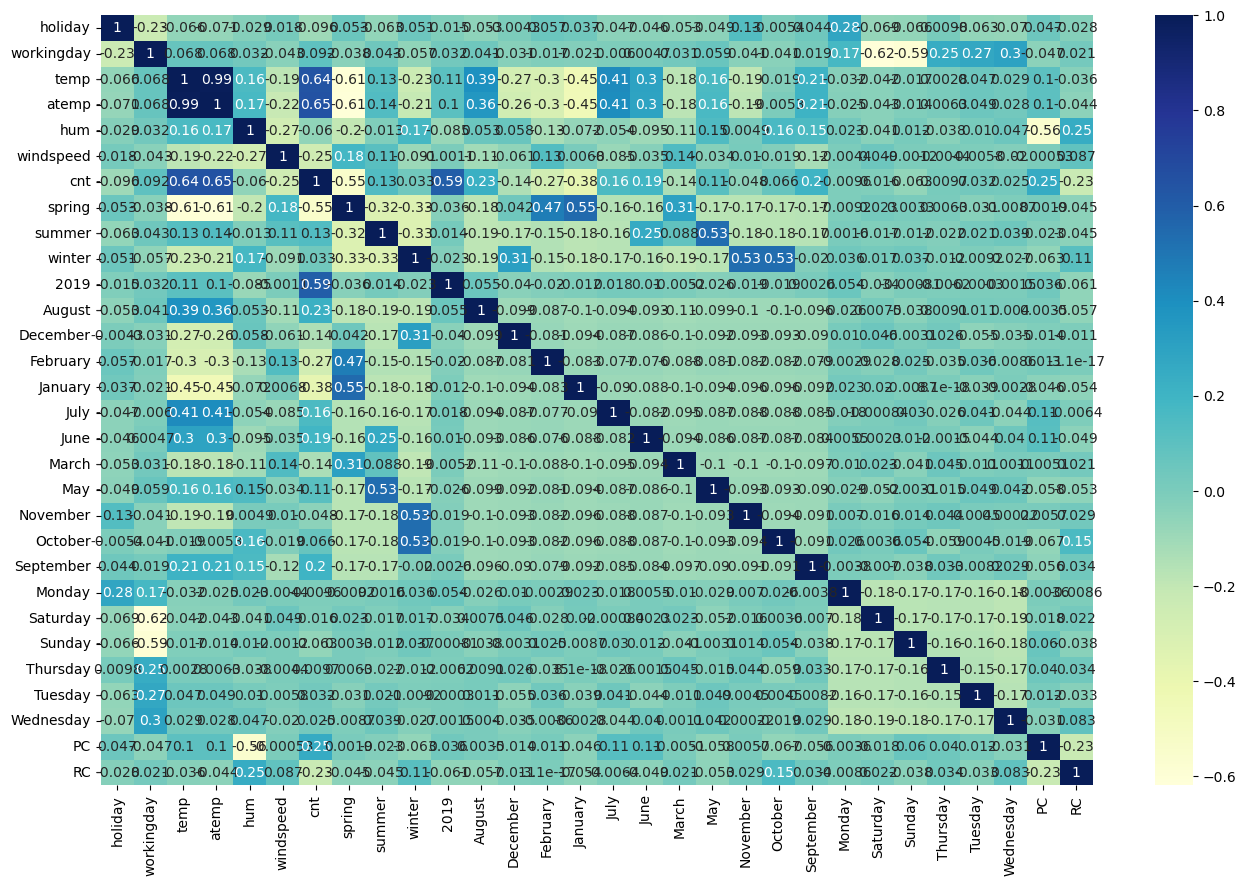

In [31]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `temp` seems to the correlated to `atemp` the most. Let's see a pairplot for `temp` vs `atemp`.

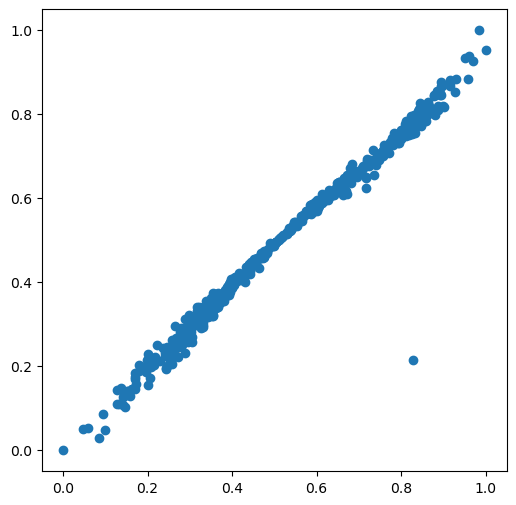

In [32]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.atemp)
plt.show()

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     510 non-null    int64  
 1   workingday  510 non-null    int64  
 2   temp        510 non-null    float64
 3   atemp       510 non-null    float64
 4   hum         510 non-null    float64
 5   windspeed   510 non-null    float64
 6   cnt         510 non-null    float64
 7   spring      510 non-null    int32  
 8   summer      510 non-null    int32  
 9   winter      510 non-null    int32  
 10  2019        510 non-null    int32  
 11  August      510 non-null    int32  
 12  December    510 non-null    int32  
 13  February    510 non-null    int32  
 14  January     510 non-null    int32  
 15  July        510 non-null    int32  
 16  June        510 non-null    int32  
 17  March       510 non-null    int32  
 18  May         510 non-null    int32  
 19  November    510 non-null    int32

### Dividing into X and Y sets for the model building

In [34]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

We are going to build a linear modle with all the features

In [35]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [36]:
# Check the parameters obtained

lr.params

const         0.196412
holiday      -0.001517
workingday    0.084756
temp          0.401322
atemp         0.050628
hum          -0.151812
windspeed    -0.184388
spring       -0.048580
summer        0.038216
winter        0.105387
2019          0.232208
August        0.016076
December     -0.045572
February     -0.032176
January      -0.062565
July         -0.039277
June         -0.001704
March         0.001288
May           0.024691
November     -0.041783
October       0.007695
September     0.081806
Monday       -0.021502
Saturday      0.083853
Sunday        0.029321
Thursday     -0.009750
Tuesday      -0.019308
Wednesday    -0.005733
PC            0.061030
RC           -0.195667
dtype: float64

In [37]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          8.42e-181
Time:                        21:03:30   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1964      0.037      5.256      0.0

With All features selected can see the R-squared value is 0.853

### RFE
Recursive feature elimination: We will RFE to select the features automatically based on the input count

In [38]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=16)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', False, 2),
 ('winter', True, 1),
 ('2019', True, 1),
 ('August', False, 2),
 ('December', False, 2),
 ('February', False, 2),
 ('January', True, 1),
 ('July', False, 2),
 ('June', False, 2),
 ('March', False, 2),
 ('May', False, 2),
 ('November', False, 2),
 ('October', False, 2),
 ('September', True, 1),
 ('Monday', False, 2),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 2),
 ('Tuesday', False, 2),
 ('Wednesday', False, 2),
 ('PC', True, 1),
 ('RC', True, 1)]

In [41]:
#Column array created with the selected features
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'winter',
       '2019', 'January', 'September', 'Saturday', 'Sunday', 'PC', 'RC'],
      dtype='object')

In [42]:
#extract only features selected dataframe 
X_train_rfe = X_train[col]

In [43]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const         0.138128
holiday      -0.037122
workingday    0.071088
temp          0.434359
atemp         0.105773
hum          -0.136009
windspeed    -0.172973
winter        0.096630
2019          0.231272
January      -0.076129
September     0.077080
Saturday      0.079577
Sunday        0.024584
PC            0.053737
RC           -0.200274
dtype: float64

In [44]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          2.39e-178
Time:                        21:08:46   Log-Likelihood:                 483.39
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     496   BIC:                            -879.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1381      0.028      4.876      0.0

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [45]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,51.66
2,temp,51.39
1,workingday,46.15
10,Saturday,11.13
11,Sunday,10.94
0,holiday,2.74
4,hum,1.88
12,PC,1.62
8,January,1.44
6,winter,1.30


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `atemp` as it has a very high p-value of `0.459`. Let's go ahead and drop this variables

In [47]:
# Dropping highly correlated variables and insignificant variables
X = X_train_rfe.drop('atemp', axis=1)

In [48]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [49]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.4
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          2.20e-179
Time:                        21:10:57   Log-Likelihood:                 483.11
No. Observations:                 510   AIC:                            -940.2
Df Residuals:                     497   BIC:                            -885.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1391      0.028      4.918      0.0

In [50]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,46.02
9,Saturday,11.09
10,Sunday,10.91
0,holiday,2.74
3,hum,1.87
2,temp,1.71
11,PC,1.62
7,January,1.44
5,winter,1.29
4,windspeed,1.19


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `workingday` has a significantly high VIF (`46.02`). Hence, this variable isn't of much use and should be dropped.

In [51]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('workingday', axis=1)

In [52]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [53]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.4
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          2.20e-179
Time:                        21:12:20   Log-Likelihood:                 483.11
No. Observations:                 510   AIC:                            -940.2
Df Residuals:                     497   BIC:                            -885.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2106      0.035      6.067      0.0

In [54]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,12.95
1,temp,10.79
3,windspeed,3.82
10,PC,2.88
5,2019,2.04
4,winter,1.71
6,January,1.48
8,Saturday,1.23
9,Sunday,1.23
7,September,1.16


### Dropping the variable and updating the model

As you might have noticed, dropping `workingday` decreased the VIF of `hum` as well. But, we can still see some of them have a high p-value. `Saturday` for instance, has a p-value of 0.477. We should drop this variable as well.

In [55]:
X = X.drop('Saturday', axis=1)

In [56]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [57]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.3
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          1.90e-180
Time:                        21:15:35   Log-Likelihood:                 482.85
No. Observations:                 510   AIC:                            -941.7
Df Residuals:                     498   BIC:                            -890.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2129      0.035      6.164      0.0

In [58]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,12.90
1,temp,10.79
3,windspeed,3.78
9,PC,2.87
5,2019,2.04
4,winter,1.70
6,January,1.48
8,Sunday,1.19
7,September,1.16
10,RC,1.14


We can still see 'hum' is having VIF value higher then 5. So will drop this too.

In [59]:
X = X.drop('hum', axis=1)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.6
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          3.91e-179
Time:                        21:17:07   Log-Likelihood:                 476.92
No. Observations:                 510   AIC:                            -931.8
Df Residuals:                     499   BIC:                            -885.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1162      0.020      5.791      0.0

In [60]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.28
2,windspeed,3.24
8,PC,2.74
4,2019,2.04
3,winter,1.29
7,Sunday,1.17
5,January,1.16
6,September,1.16
9,RC,1.11
0,holiday,1.05


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [61]:
y_train_cnt = lr_5.predict(X_train_lm)

Text(0.5, 0, 'Errors')

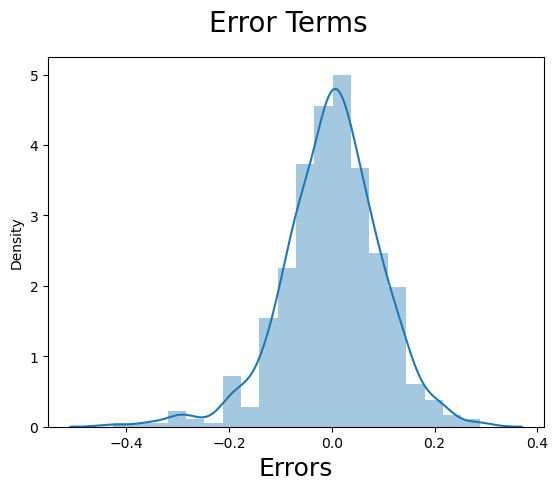

In [62]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

It can be clearly seen, residual are randomly distributed around zero and have normal distribution.

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [63]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])


In [64]:
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,PC,RC
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.652968,0.027397
std,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.477117,0.163612
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [65]:
y_test = df_test.pop('cnt')
X_test = df_test

In [66]:
X_test = X_test[col]

In [67]:
X_test.head()

,holiday,workingday,temp,atemp,hum,windspeed,winter,2019,January,September,Saturday,Sunday,PC,RC
184,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,0,0,0,0
535,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0,0,1,0
299,0,1,0.511964,0.496145,0.837699,0.334206,1,0,0,0,0,0,0,0
221,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,0,0,0,1,0
152,0,1,0.817246,0.741471,0.314298,0.537414,0,0,0,0,0,0,1,0


In [68]:
# Adding constant variable to test dataframe
X_test_m5 = sm.add_constant(X_test)

In [69]:
# Creating X_test_m5 dataframe by dropping variables from X_test_m5

X_test_m5 = X_test_m5.drop(["atemp", "workingday", "Saturday", "hum"], axis = 1)

In [70]:
# Making predictions using the fourth model

y_pred_m5 = lr_5.predict(X_test_m5)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

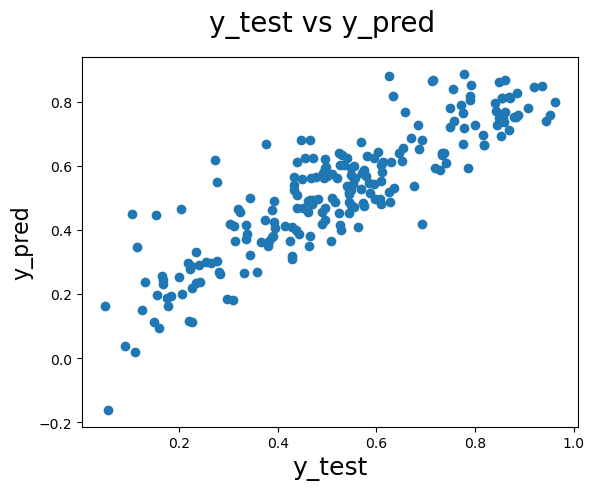

In [71]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [73]:
lr_5.params

const        0.116158
holiday     -0.111800
temp         0.511303
windspeed   -0.150924
winter       0.090114
2019         0.234106
January     -0.080163
September    0.073106
Sunday      -0.050850
PC           0.075761
RC          -0.216653
dtype: float64


We can see that the equation of our best fitted line is:

$ cnt = -0.112  \times  holiday + 0.511  \times  temp -0.150 \times windspeed +  0.090 \times winter + 0.234 \times yr -0.080 \times January + 0.073 \times September -0.050 \times Sunday + 0.075 \times PC - 0.217 \times RC + const $


Each coefficient (the number before each predictor variable) indicates the strength and direction of the relationship between that predictor variable and the outcome variable (cnt).

Here's what can be concluded based on the coefficients:

-  A positive coefficient indicates a positive relationship between the predictor variable and the outcome variable. For example, temp, yr, September, PC are positively related to cnt. This means that as these variables increase, cnt is expected to increase as well.
-  A negative coefficient indicates a negative relationship between the predictor variable and the outcome variable. For example, holiday, windspeed, winter, January, Sunday, RC are negatively related to cnt. This means that as these variables increase, cnt is expected to decrease.
-  The magnitude of the coefficient indicates the strength of the relationship. Higher magnitude coefficients have a stronger influence on the outcome variable.
-  The constant (const) is the value of the outcome variable when all predictor variables are zero.

Overall we have a decent model, but we also acknowledge that we could do better. 

We have a couple of options:
1. Add new features (bathrooms/bedrooms, area/stories, etc.)
2. Build a non-linear model

R-squared score on the test set

In [72]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m5)

0.769648306348986